# Deep analysis on columns used by active reports

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir("./datasets")

['active_reports.csv',
 'active_reports_since_last_modified_date.csv',
 'active_reports_that_have_been_running_the_longest.csv',
 'active_reports_that_have_been_running_the_longest_in_period.csv',
 'Page_View_by_USER_ID_DERIVED-SESSION_KEY.csv',
 'Page_View_error_log.csv']

### Loading active reports

In [3]:
active_reports = pd.read_csv("./datasets/active_reports.csv", low_memory=False, keep_default_na=False)

Let's take a look on the active reports

In [4]:
active_reports.head()

,CreatedById,CreatedDate,Description,DeveloperName,FolderName,Format,Id,IsDeleted,LastModifiedById,LastModifiedDate,...,DB_CPU_TIME,NUMBER_BUCKETS,TIMESTAMP_DERIVED,USER_ID_DERIVED,CLIENT_IP,URI_ID_DERIVED,REPORT_ID_DERIVED,ORIGIN,IsActiveSinceCreation,IsActiveSinceLastModification
0,0050b000004KNJdAAO,2021-10-11T06:18:06.000Z,Test Report with only some parameters,AnyQ,Pankaj_Pande,Tabular,00O2R000004F38wUAC,False,0050b000004KNJdAAO,2022-01-04T08:41:10.000,...,20.0,1,2022-06-04T12:35:47.938Z,0050b000004KNJdAAO,168.159.160.201,,00O2R000004F38wUAC,ReportRunFromLightning,True,False
1,0050b000004KNJdAAO,2021-10-11T06:18:06.000Z,Test Report with only some parameters,AnyQ,Pankaj_Pande,Tabular,00O2R000004F38wUAC,False,0050b000004KNJdAAO,2022-01-04T08:41:10.000,...,3540,1,2022-06-04T02:23:08.584Z,0050b000004KNJdAAO,168.159.160.201,,00O2R000004F38wUAC,ReportRunFromLightning,True,False
2,0050b000004KNJdAAO,2021-10-11T06:18:06.000Z,Test Report with only some parameters,AnyQ,Pankaj_Pande,Tabular,00O2R000004F38wUAC,False,0050b000004KNJdAAO,2022-01-04T08:41:10.000,...,4690,1,2022-06-04T01:04:48.613Z,0050b000004KNJdAAO,168.159.160.201,,00O2R000004F38wUAC,ReportRunFromLightning,True,False
3,0050b000004KNJdAAO,2021-05-26T09:23:29.000Z,Test Report with only some parameters,Main_1,Pankaj_Pande,Tabular,00O2R000003zUb9UAE,False,0050b000004KNJdAAO,2021-09-06T12:24:00.000,...,40.0,1,2022-06-04T22:46:04.525Z,0050b000004KNJdAAO,168.159.160.201,,00O2R000003zUb9UAE,ReportRunFromLightning,True,False
4,0050b000004MLeRAAW,2020-02-15T07:34:10.000Z,,My_Cases_and_Tasks_CARE_t7v,Dell Care Reports,Tabular,00O2R0000043lHKUAY,False,0050b000004MLUkAAO,2021-02-20T17:01:39.000,...,40,0,2022-06-04T05:37:05.980Z,0052R00000APEgvQAH,143.166.255.114,,00O2R0000043lHKUAY,ReportRunFromLightning,True,False


### Loading report events

In [5]:
report_events = pd.read_csv("data/Salesforce/Objects/ReportEvent_50k_Sample.csv", low_memory=False, keep_default_na=False)

Let's take a look on the report events. The column `ColumnHeaders` storage the columns used in each report

In [6]:
report_events.head()

,ColumnHeaders,CreatedDate,DashboardId,DashboardName,Description,DisplayedFieldEntities,EvaluationTime,EventDate,EventIdentifier,EventSource,...,RelatedEventIdentifier,ReportId,RowsProcessed,Scope,Sequence,SessionKey,SessionLevel,SourceIp,UserId,Username
0,"[UserServicePresence.StatusStartDate, UserServ...",2022-06-01T13:10:40.563Z,,,,"User,UserServicePresence,ServicePresenceStatus",0.0,2022-06-01T13:10:39.103Z,1d6ab64e-3037-4b55-adde-aa201e6c837a,Classic,...,,00O0b000004kkZKEAY,0.0,organization,1,,,,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
1,"[UserServicePresence.StatusStartDate, UserServ...",2022-05-26T12:48:49.891Z,,,,"User,UserServicePresence,ServicePresenceStatus",0.0,2022-05-26T12:48:48.928Z,2da2bd62-c797-4dfd-ae59-e780e49637a1,Classic,...,,00O0b000004kkZKEAY,0.0,organization,1,,,,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
2,"[UserServicePresence.StatusStartDate, UserServ...",2022-05-25T13:22:26.467Z,,,,"User,UserServicePresence,ServicePresenceStatus",0.0,2022-05-25T13:22:18.205Z,4c39d2ef-bd8d-4e38-8183-f41222e150b1,Classic,...,,00O0b000004kkZKEAY,0.0,organization,1,,,,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
3,"[Case.CaseNumber, Case.Subject, Case.Case_Age_...",2022-05-24T12:51:48.336Z,,,,"Activity,Case",0.0,2022-05-24T12:51:41.742Z,537421ae-517f-473d-820d-50823f0f26b2,Classic,...,,00O0b000004kTazEAE,4.0,user,1,,,,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
4,"[CASE_NUMBER, SUBJECT, EMAIL.MESSAGE_DATE, EMA...",2022-05-24T12:51:50.365Z,,,What are the incoming emails on cases that I'm...,"EmailMessage,Case",0.0,2022-05-24T12:51:41.593Z,c97f1d48-374f-4f2b-a673-8120a42b65b9,Classic,...,,00O0b000004kpcxEAA,0.0,user,1,,,,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices


Now, let's filter the `report events` by `active reports` to get the columns used on active reports. In order to do that, we can filter the `report events` matching the column `reportID` with the `Id` from the active reports 

In [7]:
active_report_events = report_events[report_events.ReportId.isin(active_reports.Id)]

Here we have the report events of the active reports

In [8]:
active_report_events.head()

,ColumnHeaders,CreatedDate,DashboardId,DashboardName,Description,DisplayedFieldEntities,EvaluationTime,EventDate,EventIdentifier,EventSource,...,RelatedEventIdentifier,ReportId,RowsProcessed,Scope,Sequence,SessionKey,SessionLevel,SourceIp,UserId,Username
0,"[UserServicePresence.StatusStartDate, UserServ...",2022-06-01T13:10:40.563Z,,,,"User,UserServicePresence,ServicePresenceStatus",0.0,2022-06-01T13:10:39.103Z,1d6ab64e-3037-4b55-adde-aa201e6c837a,Classic,...,,00O0b000004kkZKEAY,0.0,organization,1,,,,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
1,"[UserServicePresence.StatusStartDate, UserServ...",2022-05-26T12:48:49.891Z,,,,"User,UserServicePresence,ServicePresenceStatus",0.0,2022-05-26T12:48:48.928Z,2da2bd62-c797-4dfd-ae59-e780e49637a1,Classic,...,,00O0b000004kkZKEAY,0.0,organization,1,,,,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
2,"[UserServicePresence.StatusStartDate, UserServ...",2022-05-25T13:22:26.467Z,,,,"User,UserServicePresence,ServicePresenceStatus",0.0,2022-05-25T13:22:18.205Z,4c39d2ef-bd8d-4e38-8183-f41222e150b1,Classic,...,,00O0b000004kkZKEAY,0.0,organization,1,,,,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
3,"[Case.CaseNumber, Case.Subject, Case.Case_Age_...",2022-05-24T12:51:48.336Z,,,,"Activity,Case",0.0,2022-05-24T12:51:41.742Z,537421ae-517f-473d-820d-50823f0f26b2,Classic,...,,00O0b000004kTazEAE,4.0,user,1,,,,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
4,"[CASE_NUMBER, SUBJECT, EMAIL.MESSAGE_DATE, EMA...",2022-05-24T12:51:50.365Z,,,What are the incoming emails on cases that I'm...,"EmailMessage,Case",0.0,2022-05-24T12:51:41.593Z,c97f1d48-374f-4f2b-a673-8120a42b65b9,Classic,...,,00O0b000004kpcxEAA,0.0,user,1,,,,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices


Converting column `ColumnHeaders` to list.
> This operation can throw an warning (SettingWithCopyWarning) because we are doing a slice followed by a set operation but it doesn't couses any damage to our analysis

In [9]:
active_report_events['ColumnHeaders'] = active_report_events.ColumnHeaders.apply(lambda x: [el.strip() for el in x[1:-1].split(',')])

C:\Users\Debora\AppData\Local\Temp\ipykernel_9192\672214629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_report_events['ColumnHeaders'] = active_report_events.ColumnHeaders.apply(lambda x: [el.strip() for el in x[1:-1].split(',')])


Let's create a `dict` to store the name of column and a list with the IDs of reports that use this column

The format is: `name_of_column: [IDs of reports that use the column]`

In [10]:
columns_usage = {}
for index, row in active_report_events.iterrows():
    for header in row['ColumnHeaders']:
        if row['ReportId'] == '':
            continue
        if header not in columns_usage:
            columns_usage[header] = [row['ReportId']]
        elif row['ReportId'] not in columns_usage[header]:
            columns_usage[header].append(row['ReportId'])

Let's filter to take only the columns that are used in more than one report

In [11]:
columns_more_than_one = {column : len(ids) for column, ids in columns_usage.items() if len(ids) > 1}
columns_more_than_one = dict(sorted(columns_more_than_one.items(), key=lambda item: item[1], reverse=True))

The graph below shows the usage of a column. As you can see, a lot of columns are used in more than one report, so the x axis is messy.

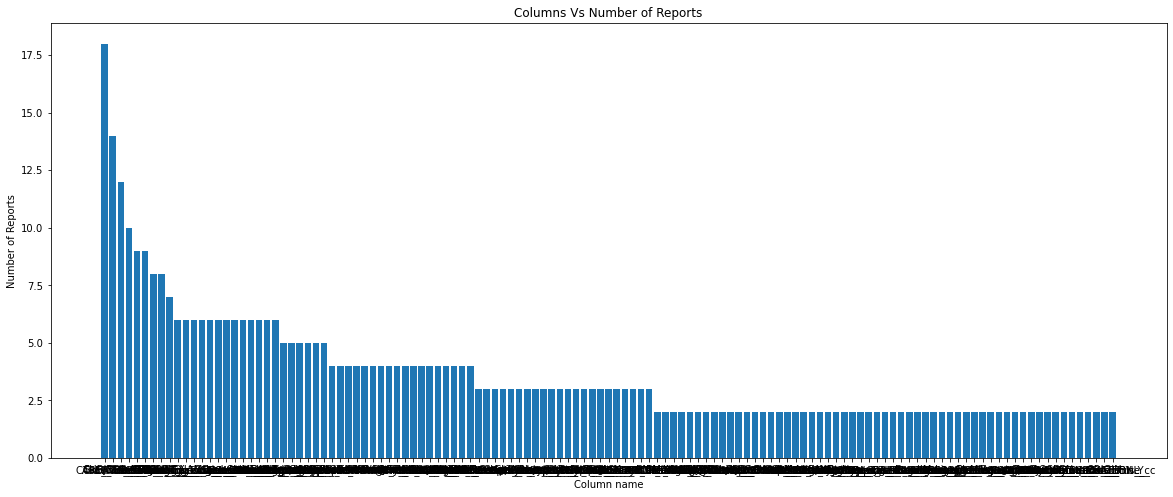

In [12]:
plt.figure(figsize=(20,8))
plt.bar(columns_more_than_one.keys(), columns_more_than_one.values())
plt.title('Columns Vs Number of Reports')
plt.xlabel('Column name')
plt.ylabel('Number of Reports')
plt.show()

The number of reports is a lot less than the analysis using all the reports. The y axis goes until 17 but using all the reports it goes until 80

Let's build a TOP 10 columns that are used the most

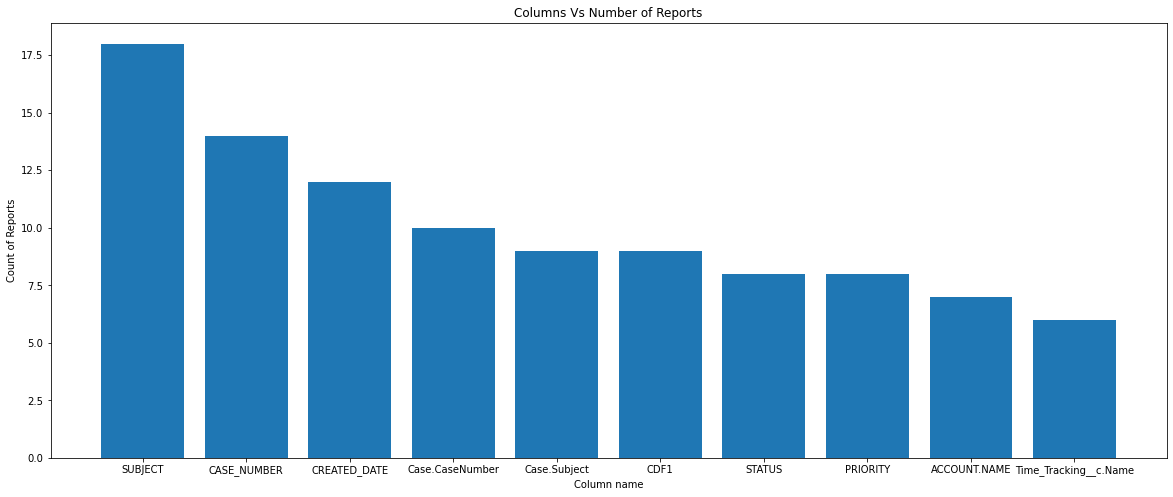

In [13]:
top_10_count = dict(list(columns_more_than_one.items())[:10])

plt.figure(figsize=(20,8))
plt.bar(top_10_count.keys(), top_10_count.values())
plt.title('Columns Vs Number of Reports')
plt.xlabel('Column name')
plt.ylabel('Count of Reports')
plt.show()

You can see that the column `SUBJECT` is being used in 17 reports. These columns are almost the same of the analysis using all the reports but there are new ones, like `CDF1`, `Case.CaseNumber`, `Time_Tracking__C.Name`

Now, let's see the amount of columns that are used in more than one report versus the amount of columns that are used in only one

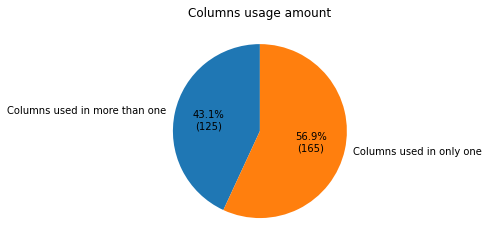

In [14]:
m_t_one = 0 # more than one
one = 0     # only one

for header, ids in columns_usage.items():
    if len(ids) > 1:
        m_t_one += 1
    else: one += 1


def calc_pct(pct, sizes):
    total = sum(sizes)
    absolute = round((pct / 100)*total)
    return "{:.1f}%\n({:d})".format(pct, absolute)
        
labels = 'Columns used in more than one', 'Columns used in only one'
sizes = [m_t_one, one]

fig1, ax1 = plt.subplots()
ax1.set(aspect="equal", title='Columns usage amount')
ax1.pie(sizes, labels=labels, autopct=lambda pct: calc_pct(pct, sizes), startangle=90)

plt.show()

The amount of columns used in more than one report (125) was dropped in more than half compared to the analysis using all the reports (390) 

# Which components use these columns?

I couldn't find a way to cross the information about the columns usage with the components information.